In [1]:
import tensorflow as tf

In [2]:
tf.set_random_seed(777)

In [3]:
x_train = [1,2,3]
y_train = [1,2,3]

In [4]:
# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out

W = tf.Variable(tf.random.normal([1]), name = "weight") # Rank is 1
b = tf.Variable(tf.random.normal([1]), name = "bias")

# Our hypothesis XW+b
hypothesis = x_train * W + b

Instructions for updating:
Colocations handled automatically by placer.


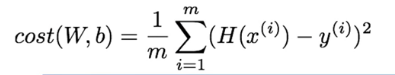

In [5]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) 

In [15]:
t = [1.,2.,3.,4.]
mean = tf.reduce_mean(t) # ==> 2.5
sess = tf.Session()
sess.run(mean)

2.5

In [17]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

In [18]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001) :
    sess.run(train)
    if step % 20 == 0 :
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 2.823292 [2.1286771] [-0.8523567]
20 0.19035067 [1.533928] [-1.0505961]
40 0.15135698 [1.4572546] [-1.0239124]
60 0.1372696 [1.4308538] [-0.9779527]
80 0.12466871 [1.4101374] [-0.93219817]
100 0.113226034 [1.3908179] [-0.8884077]
120 0.10283363 [1.3724468] [-0.8466577]
140 0.09339521 [1.3549428] [-0.80686814]
160 0.084823035 [1.3382617] [-0.7689483]
180 0.07703761 [1.3223647] [-0.73281056]
200 0.06996683 [1.3072149] [-0.6983712]
220 0.06354501 [1.2927768] [-0.6655505]
240 0.057712615 [1.2790174] [-0.63427216]
260 0.0524155 [1.2659047] [-0.6044637]
280 0.04760464 [1.2534081] [-0.57605624]
300 0.043235257 [1.2414987] [-0.5489836]
320 0.039266944 [1.2301493] [-0.5231833]
340 0.03566285 [1.2193329] [-0.49859545]
360 0.032389563 [1.2090251] [-0.47516325]
380 0.029416703 [1.1992016] [-0.45283225]
400 0.026716745 [1.18984] [-0.4315508]
420 0.024264557 [1.1809182] [-0.41126958]
440 0.022037461 [1.1724157] [-0.39194146]
460 0.020014787 [1.1643128] [-0.37352163]
480 0.018177731 [1.1565907] [-0

In [24]:
# Using placeholders

# Now we can use X and Y in place of x_data and y_data
# placeholders for a tensor that will be always fed using feed_dict

X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32)

In [25]:
# Try to find value for W and b to compute y_data = x_data * W + b  
# We know that W should be 1 and b should be 0
# But let's TensorFlow figure it out 

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

In [26]:
# Out hypothesis XW+b
hypothesis = X * W + b

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [27]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

In [28]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [30]:
for step in range(2001) :
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict = {X: [1,2,3], Y: [1,2,3]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

0 4.9221208e-06 [0.9974294] [0.00584357]
200 1.87965e-06 [0.9984115] [0.00361102]
400 7.178405e-07 [0.9990183] [0.00223157]
600 2.7415433e-07 [0.9993933] [0.00137922]
800 1.0479207e-07 [0.9996248] [0.0008527]
1000 4.007005e-08 [0.99976796] [0.0005273]
1200 1.5368343e-08 [0.99985635] [0.0003264]
1400 5.8856813e-09 [0.9999112] [0.00020201]
1600 2.263775e-09 [0.9999448] [0.00012517]
1800 8.648395e-10 [0.99996585] [7.750218e-05]
2000 3.4100367e-10 [0.9999788] [4.8540674e-05]


In [31]:
# Fit the line with new training data
for step in range(2001):
    cost_val, W_val, b_val, _ = \
        sess.run([cost, W, b, train],
                 feed_dict={X: [1, 2, 3, 4, 5],
                            Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    if step % 200 == 0:
        print(step, cost_val, W_val, b_val)

0 1.2100328 [1.0659806] [0.02204884]
200 0.04901417 [1.1432478] [0.58282983]
400 0.012647167 [1.0727652] [0.8372943]
600 0.0032633697 [1.0369625] [0.9665538]
800 0.0008420525 [1.0187757] [1.0322136]
1000 0.00021727162 [1.0095375] [1.0655668]
1200 5.6059864e-05 [1.0048445] [1.0825094]
1400 1.4465072e-05 [1.002461] [1.0911155]
1600 3.732172e-06 [1.0012499] [1.0954869]
1800 9.635044e-07 [1.0006353] [1.0977069]
2000 2.4888877e-07 [1.0003228] [1.0988345]


In [32]:
# Testing our model
# y = x + 1.1

print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[6.1004486]
[3.5996416]
[2.5993187 4.599964 ]


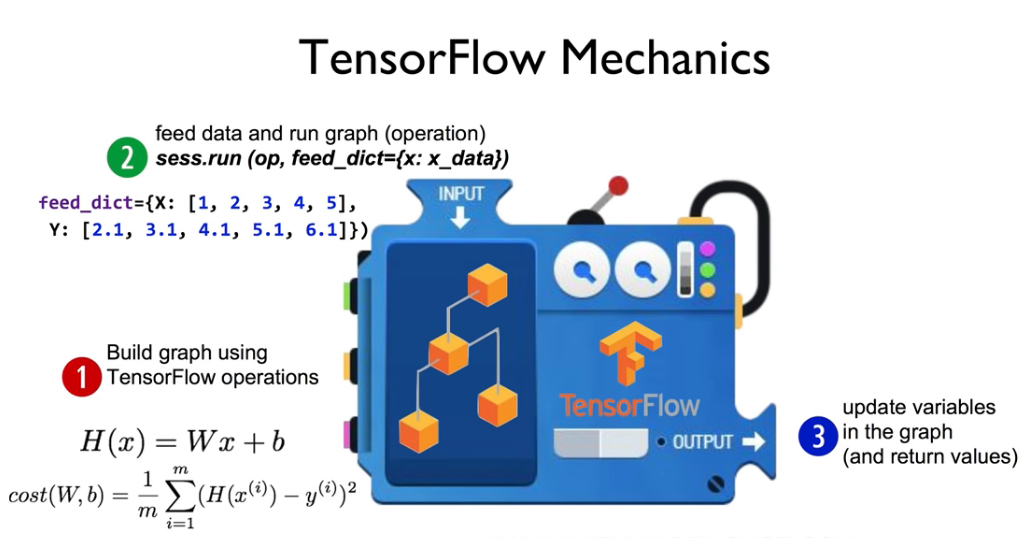